# An overview of supervised classification techniques with case study :
## Predicting liver disease from data

## Introduction

We will go through the entire data pipeline from data cleaning, preprocessing, staging and modelling on a relatively small dataset (~600 entries). On our way, we will compare different machine learning models and try to measure their performance using various metrics.



## Dataset

The dataset for this problem is the ILPD (Indian Liver Patient Dataset) taken from the UCI Machine Learning Repository (URL https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset) ). Number of instances are 583. It is a multivariate data set, contain 10 variables that are age, gender, total Bilirubin, direct Bilirubin, total proteins, albumin, A/G ratio, SGPT, SGOT and Alkphos. All values are real integers. This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records. Any patient whose age exceeded 89 is listed as being of age "90".

----
## Reading Data
Below, we will load the ILPD data. 

In [1]:
import matplotlib.pyplot as plt

In [2]:
# We will need following libraries
import numpy as np
import pandas as pd

# Loading the ILPD dataset
df = pd.read_csv("ILPD.csv")

print (f"No of samples: {df.shape[0]}. No of features in each sample: {df.shape[1]} .")
# Display the first  5 records
df.head()



No of samples: 582. No of features in each sample: 11 .


,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


 As you can see above, the raw dataset does not have any column headings. So, we will manually add the headings taken from the URL mentioned above.

In [3]:
headings = ['Age','Gender','Total Bilirubin','Direct Bilirubin','Total Proteins','Albumin',
            'A/G ratio','SGPT','SGOT','Alkphos','Disease']
df = pd.read_csv("ILPD.csv", names = headings)

In [4]:
# The last column - 'Disease', contains the labels
df.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Total Proteins,Albumin,A/G ratio,SGPT,SGOT,Alkphos,Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


----
## Preprocessing Data


### 1. Removing duplicates
Duplicates rows can be present in data due to various reasons. The question about whether duplicates should be removed or not depends on the particular problem setting and context. For example - In linear regression, if you have duplicate rows, then the underlying assumption about standard error terms being uncorrelated will be violated, which will lead our model to underestimate the actual standard errors. Thus, duplicates must be removed in that case.

In our case, removing duplicates makes sense, as most likely it is possible that someone entered the data for a patient multiple times.

In [5]:
df.shape # rows, columns of original dataset

(583, 11)

In [6]:
df_duplicate = df[df.duplicated(keep = False)] # keep = False gives you all rows with duplicate entries
df_duplicate

,Age,Gender,Total Bilirubin,Direct Bilirubin,Total Proteins,Albumin,A/G ratio,SGPT,SGOT,Alkphos,Disease
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [7]:
df = df[~df.duplicated(subset = None, keep = 'first')]
# Here, keep = 'first' ensures that only the first row is taken into the final dataset.
# The '~' sign tells pandas to keep all values except the 13 duplicate values
df.shape

(570, 11)

### 2. Dealing with null values


We will remove null values (or perform some kind of imputation) before running models on the data. We can use Imputer from sklearn.preprocessing or fillna() for this purpose.

In [8]:
print(df.isnull().sum()) # display number of null values by column

Age                 0
Gender              0
Total Bilirubin     0
Direct Bilirubin    0
Total Proteins      0
Albumin             0
A/G ratio           0
SGPT                0
SGOT                0
Alkphos             4
Disease             0
dtype: int64


In [9]:
# We can see that the column 'Alkphos' has 4 missing values
# One way to deal with them can be to just directly remove these 4 values
print ("length before removing NaN values:%d"%len(df))
df2 = df[pd.notnull(df['Alkphos'])]
print ("length after removing NaN values:%d"%len(df2))

length before removing NaN values:570
length after removing NaN values:566


Data imputation of missing values with a certain order statistic(mean, mode, median) can be done if sufficient context is available. For example - In our case, let us print those rows whose values of column 'Alkphos' are missing.

In [10]:
df[~pd.notnull(df['Alkphos'])]

,Age,Gender,Total Bilirubin,Direct Bilirubin,Total Proteins,Albumin,A/G ratio,SGPT,SGOT,Alkphos,Disease
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


There is no homogeneity among patients at least in terms of age and gender, so it may be more difficult to impute a value in this case. Right now, just to show how imputation is done, we will substitute these values with the mode of 'Alkphos'. 
Later on, we can check the importance of the variable 'Alkphos' to see whether this column is significant enough to warrant an effort on trying different imputations.

In [11]:
df['Alkphos'] = df['Alkphos'].fillna(df['Alkphos'].mode().iloc[0])
df['Alkphos'].unique()

array([0.9 , 0.74, 0.89, 1.  , 0.4 , 1.3 , 1.1 , 1.2 , 0.8 , 0.6 , 0.87,
       0.7 , 0.92, 0.55, 0.5 , 1.85, 0.95, 1.4 , 1.18, 0.61, 1.34, 1.39,
       1.6 , 1.58, 1.25, 0.78, 0.76, 1.55, 0.71, 0.62, 0.67, 0.75, 1.16,
       1.5 , 1.66, 0.96, 1.38, 0.52, 0.47, 0.93, 0.48, 0.58, 0.69, 1.27,
       1.12, 1.06, 0.53, 1.03, 0.68, 1.9 , 1.7 , 1.8 , 0.3 , 0.97, 0.35,
       1.51, 0.64, 0.45, 1.36, 0.88, 1.09, 1.11, 1.72, 2.8 , 0.46, 0.39,
       1.02, 2.5 , 0.37])

In [12]:
df['Alkphos'].value_counts()# 1 actually occurs twice as more as the next frequent value, maybe this should give some
#justification as to why the mode may be appropriate

1.00    108
0.80     62
0.90     57
0.70     53
1.10     45
1.20     35
0.60     31
0.50     26
1.30     25
1.40     17
0.40     14
1.50     10
1.60      4
1.70      4
0.30      4
0.75      4
0.96      3
1.80      3
0.92      2
1.16      2
0.52      2
0.47      2
0.76      2
0.93      2
1.38      2
2.50      2
1.85      2
1.34      2
0.95      2
1.06      2
       ... 
0.48      1
0.62      1
1.12      1
1.03      1
0.53      1
0.55      1
0.46      1
0.69      1
1.25      1
1.66      1
1.55      1
0.61      1
0.39      1
0.64      1
0.78      1
0.37      1
1.27      1
0.68      1
0.67      1
0.58      1
1.11      1
0.71      1
1.72      1
0.35      1
0.45      1
0.88      1
1.02      1
1.09      1
0.89      1
1.36      1
Name: Alkphos, Length: 69, dtype: int64

In [13]:
print(df['Alkphos'].median()) # To check how different are mean and median from the mode in this particular case
print(df['Alkphos'].mean()) # Use mean only if there are no outliers in your data

0.96
0.9483684210526314


On a closing note, one can also predict the missing values by using the portion of the dataset that has non-NaN entries for that column as a training set. This methods is not ideal however, if there is no correlation between the entries with missing values and the other entries, as this method will introduce an unnecessary bias in its predictions.

### 3. Outlier Detection

Even before going to actual algorithms, we can do some outlier detection by applying filters to our data. Ex- We know that age cannot be negative.

Here we will first use Isolation Forest, which is similar to Random Forest, for outlier detection. The basic premise behind this method is that an outlier is identified much quickly (i.e., in fewer splits) of a decision tree, compared to a normal data point. Thus the anomaly score for a point is directly proportional to the average of path lengths to isolate that point over several decision trees.


In [14]:
from sklearn.ensemble import IsolationForest

/srv/app/venv/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
clf = IsolationForest(max_samples=100, contamination = 0.01, random_state=7)
# contamination indicates the percentage of outliers in the dataset (Key hyperparameter!)

In [16]:
# Running outlier detection on column 'Albumin', A/G ratio'
clf.fit(np.vstack((df['Albumin'].values, df['A/G ratio'].values)).T)# converting to np array and then passing as a 2-d array
clf_pred = clf.predict(np.vstack((df['Albumin'].values, df['A/G ratio'].values)).T)


In [17]:
clf_pred # - 1 means outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [18]:
colors = []
for i in clf_pred:
    if i == 1: colors.append('b')
    else: colors.append('r')

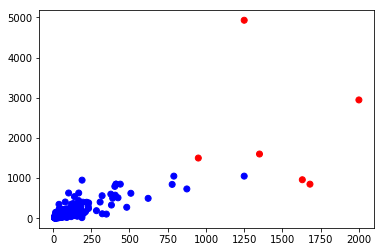

In [19]:
plt.scatter(df['Albumin'].values, df['A/G ratio'].values, color = colors)# outliers are colored red

Similarly one can run Isolation Forest on other pairs of columns and then manually inspect the outlier points.

Another method that can be used from sklearn is covariance.EllipticEnvelope, which assumes that the data given to it has a Gaussian distribution and thus fits ellipsoids on it.

### 4. Log transform certain features
After removing the column ‘Disease’ from the dataset as it is the label, we display all features in a histogram format to check if any feature has a skewed distribution. On those features, a log transformation is applied to reduce their range.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15e0914a58>,
      dtype=object)

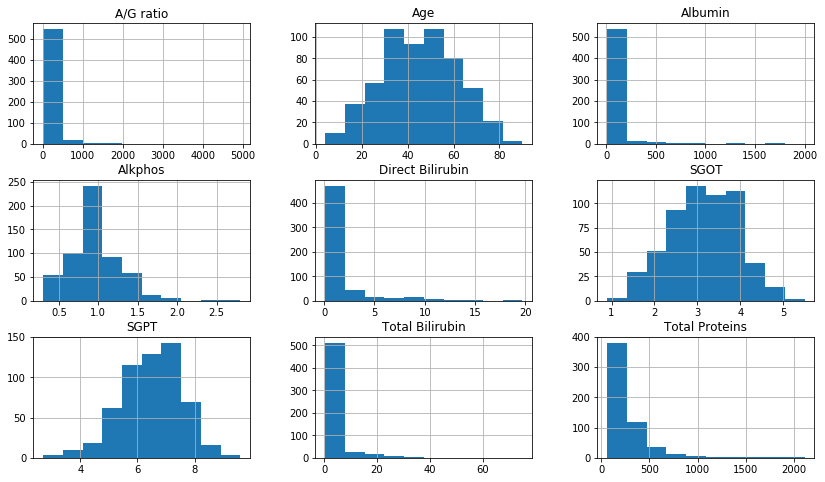

In [20]:
# Split the data into features and target label(disease)
disease_initial = df['Disease']
features_initial = df.drop('Disease', axis = 1)

# Visualize skewed continuous features of original data
features_initial.hist(figsize=(14,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f161d73d080>,
      dtype=object)

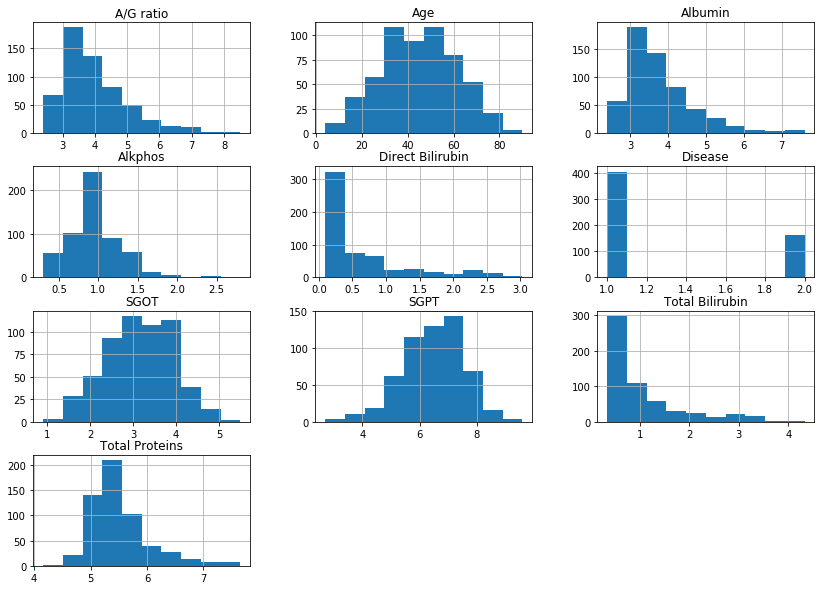

In [21]:
# Skewed features are Albumin, Direct Bilirubin, A/G ratio, Tota Bilirubin, Total Protein 
#Log-transform the skewed features
skewed = ['Albumin', 'Direct Bilirubin', 'Total Bilirubin', 'A/G ratio', 'Total Proteins']
features_initial[skewed] = df[skewed].apply(lambda x: np.log(x + 1))
df[skewed] = features_initial[skewed]
# Visualize the new log distributions
df.hist(figsize=(14,10))

Additionally, if we need certain certain features to have a normal distribution, we can do that by using the PowerTransformer method in sklearn.

### 5. Scaling of features

Standardization (subtracting mean and scaling variance) is required for many methods like regularized linear regression, K-NearestNeighbors. One can use following scaling methods - 

1. MinMaxScaler - It preserves zero entries if the feature matrix is sparse, and is also robust to small values of S.D. for features.

2. StandardScaler - Center around zero, change variance to 1.

3. RobustScaler - Useful if there are a lot of outliers in data, this method uses percentiles to center and scale data.

Normalizing, on the other hand, causes one row of the input (one sample) to have unit norm. This is useful for Gram matrix entries in kernel methods.


We use MinMaxScaler here as StandardScaler gives very low values, with some in the order of 10^-16, which might be difficult to relate to and visualize.

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()

normalized = ['Age', 'SGPT', 'SGOT', 'Alkphos', 'Albumin', 'Direct Bilirubin', 'Total Bilirubin', 'A/G ratio', 'Total Proteins']
skewed = ['Albumin', 'Direct Bilirubin', 'Total Bilirubin', 'A/G ratio', 'Total Proteins']
features_initial[normalized] = scaler.fit_transform(df[normalized])

# Show an example of a record with scaling applied
display(features_initial.describe())

,Age,Total Bilirubin,Direct Bilirubin,Total Proteins,Albumin,A/G ratio,SGPT,SGOT,Alkphos
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,0.474990,0.179828,0.175155,0.383482,0.264557,0.258082,0.550191,0.488902,0.259347
std,0.188863,0.185859,0.224849,0.151618,0.169167,0.160818,0.157725,0.173220,0.127416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.337209,0.062919,0.029648,0.290977,0.149929,0.140897,0.449275,0.369565,0.160000
50%,0.476744,0.089297,0.056921,0.338512,0.227851,0.219448,0.565217,0.478261,0.264000
75%,0.627907,0.236455,0.251327,0.440946,0.329197,0.340134,0.652174,0.630435,0.320000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 6. Dealing with categorical features
One-hot encoding is a popular method that can be used when the different values of features do not have any inherent ordering.
If we know of some ordering (such as a feature which has possible values 'Small', 'Medium', 'Large'), then using the method LabelEncoder can make more sense.
Here we use pd.get_dummies() method to one-hot encode the feature ‘Gender’ as well as the label ‘Disease’ ( with the integer ‘1’ representing presence of disease).


In [23]:
# TODO: One-hot encode the data using pandas.get_dummies()
features = pd.get_dummies(features_initial)

encoded = list(features.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))
print (encoded)

disease=pd.get_dummies(disease_initial)
encoded = list(disease.columns)
print ("{} disease columns after one-hot encoding.".format(len(encoded)))
#print disease[1]


11 total features after one-hot encoding.
['Age', 'Total Bilirubin', 'Direct Bilirubin', 'Total Proteins', 'Albumin', 'A/G ratio', 'SGPT', 'SGOT', 'Alkphos', 'Gender_Female', 'Gender_Male']
2 disease columns after one-hot encoding.


In [24]:
# Import train_test_split
from sklearn.cross_validation import train_test_split, ShuffleSplit

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, disease[1], test_size = 0.2, random_state = 7)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 456 samples.
Testing set has 114 samples.


/srv/app/venv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Modelling

### 1. Baseline Predictor

Before applying any supervised learning technique, we will implement a naïve predictor, that will simply return that every data point has ‘Disease’= True. We will check our metrics(accuracy, TPR, FPR) on that predictor.


In [25]:
disease = disease[:][1] # disease means '1', healthy means '0'

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#naive accuracy, assuming that we predict everyone has disease
positive_disease= (df['Disease'] == 1)
positive_disease.astype(int) # convert boolean array to float
report = classification_report(positive_disease, disease)
print(report)

             precision    recall  f1-score   support

      False       1.00      1.00      1.00       164
       True       1.00      1.00      1.00       406

avg / total       1.00      1.00      1.00       570



### 2. Decision Trees

In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [28]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
y_train_preds = clf.predict(X_train)
print(classification_report(y_train_preds, y_train))
print("Accuracy on training set: ", accuracy_score(y_train_preds, y_train))
y_test_preds = clf.predict(X_test)
print(classification_report(y_test_preds, y_test))
print("Accuracy on test set: ", accuracy_score(y_test_preds, y_test)) # The tree is overfitting

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       129
          1       1.00      1.00      1.00       327

avg / total       1.00      1.00      1.00       456

Accuracy on training set:  1.0
             precision    recall  f1-score   support

          0       0.37      0.33      0.35        39
          1       0.67      0.71      0.69        75

avg / total       0.57      0.58      0.57       114

Accuracy on test set:  0.5789473684210527


#### Visualizing the decision tree

In [30]:
!pip install pydotplus

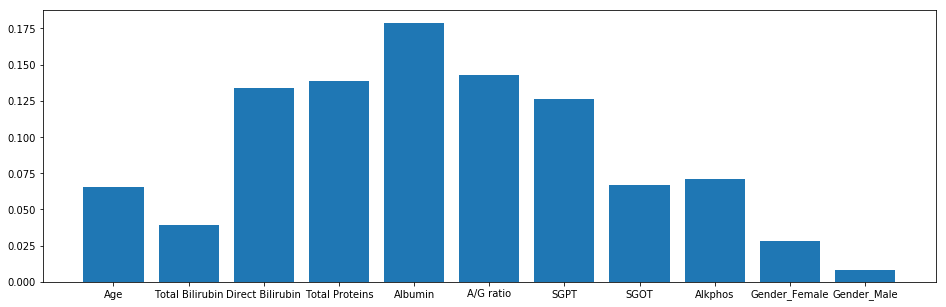

In [31]:
plt.figure(figsize = (16,5))
importances = clf.feature_importances_
x= [i for i in range(11)]
plt.xticks(x, list(features.columns))
plt.bar(x, importances)
plt.show()

In [33]:
# USE THIS CODE TO GET VISUALIZATION OF TREE STRUCTURE USING GRAPHVIZ (YOU NEED TO HAVE GRAPHVIZ INSTALLED FOR THIS TO WORK)

# import graphviz
# import os
# os.environ["PATH"] += os.pathsep + # enter folder where graphviz is installed

# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(tree, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

# !dot -Tpng tree.dot > output.png


In [35]:
from sklearn.metrics import fbeta_score, accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    results = {}

    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    results['train_time'] = end - start
        
    start = time() 
    predictions_test = learner.predict(X_test)# predictions on test set
    predictions_train = learner.predict(X_train[:200])# predictions on first 200 elements of training set
    end = time()
    
    results['pred_time'] = end - start
            
    results['acc_train'] = accuracy_score(y_train[:200],predictions_train)
        
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    results['f_train'] = fbeta_score(y_train[:200],predictions_train,beta=2)
        
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=2)
       
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    return results

### Supervised Learning Approach
Thereafter, we will use these supervised learning approaches for this problem:
1. Logistic Classification: Since the outcome is binary and we have a reasonable number of examples at our disposal compared to number of features, this approach seems suitable. At the core of this method is a logistic or sigmoid function that quantifies the difference between each prediction and its corresponding true value.                                                                  
2. Support Vector Machine:   SVM aims to find an optimal hyperplane that separates the data into different classes.                                  
3. Random Forest Classifier: It comes under the category of ensemble methods. It employs ‘bagging’ method to draw a random subset from the data, and train a Decision Tree on that.                                                           

4. k Nearest Neighbors: It uses the k closest neighbors of a data point to determine which class should that data point belong to.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# TODO: Initialize the three models

clf_base = LogisticRegression(random_state=7)
clf_A = RandomForestClassifier(random_state=7)
clf_B = SVC(random_state=7)
clf_C = KNeighborsClassifier()

# TODO: Calculate the number of samples for 20%, 50%, and 100% of the training data
samples_20 = int(len(X_train) * 0.2)
samples_50 = int(len(X_train) * 0.5)
samples_100 = int(len(X_train) )
result_1={}
result_1=train_predict(clf_base, samples, X_train, y_train, X_test, y_test)
print ('Performance metrics for benchmark model (Logistic regression):')
print ('Accuracy score on training subset:%.2f'%result_1['acc_train'])
print ('Accuracy score on test subset:%.2f'%result_1['acc_test'])
print ('F-score on training subset:%.2f'%result_1['f_train'])
print ('F-score on test subset:%.2f'%result_1['f_test'])
# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_20, samples_50, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

#vs.evaluate(results, accuracy, fscore)

### ROC Curve

An additional metric called as Receiver Operator Characteristics(ROC) curve will be used. It plots the curve of True Positive Rate vs the False positive Rate, with a greater area under the curve indicating a better True Positive Rate for the same False Positive Rate. This can be helpful in this case as simply knowing the number of correct predictions may not suffice.
  



For classifier RandomForestClassifier, ROC score is 0.659091


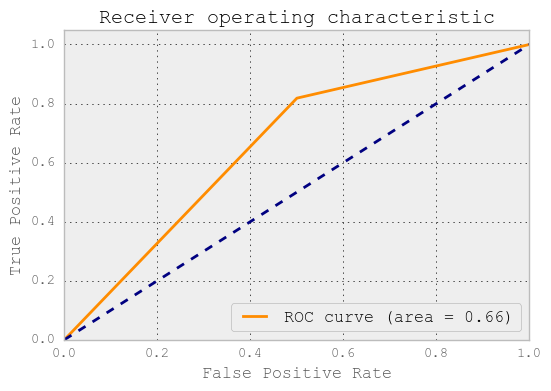

For classifier SVC, ROC score is 0.500000


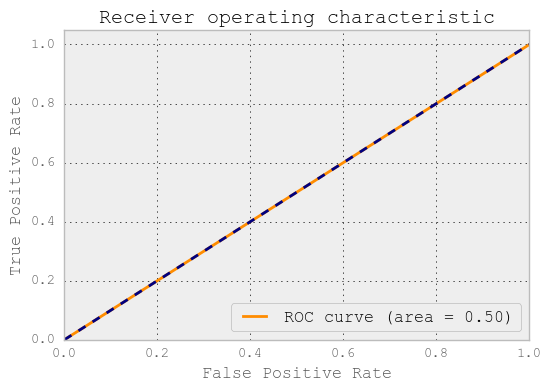

For classifier KNeighborsClassifier, ROC score is 0.523539


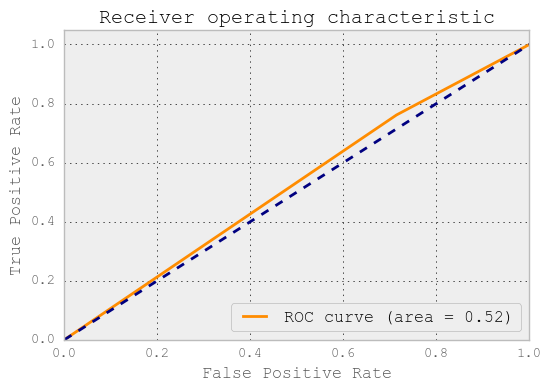

In [53]:
#plotting ROC curve

for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    pred=clf.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    print "For classifier %s, ROC score is %f"%(clf_name,roc_auc)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
#fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)

### Fine Tuning the Models
Now we will use the grid search method to see if we can improve the performance of various models with different values for the given hyperparameters. 


For classifier RandomForestClassifier:
Unoptimized model
------
Accuracy score on testing data: 0.7414
F-score on testing data: 0.8219

Optimized Model
------
Final accuracy score on the testing data: 0.7500
Final F-score on the testing data: 0.8686
Best parameters:
{'max_features': None, 'n_estimators': 15, 'oob_score': False, 'max_depth': 3}
For classifier RandomForestClassifier, ROC score is 0.603896


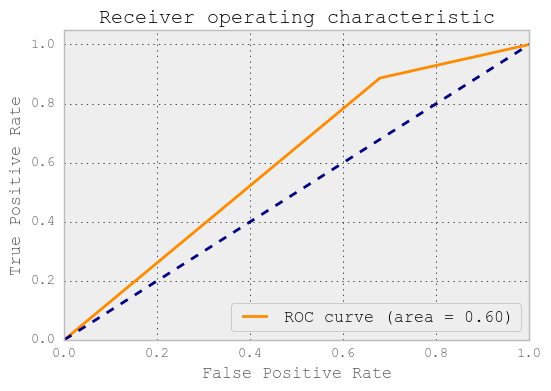


---------------------------------X----------------------------

For classifier SVC:
Unoptimized model
------
Accuracy score on testing data: 0.7586
F-score on testing data: 0.9402

Optimized Model
------
Final accuracy score on the testing data: 0.7586
Final F-score on the testing data: 0.9402
Best parameters:
{'kernel': 'poly', 'C': 0.001}
For classifier SVC, ROC score is 0.500000


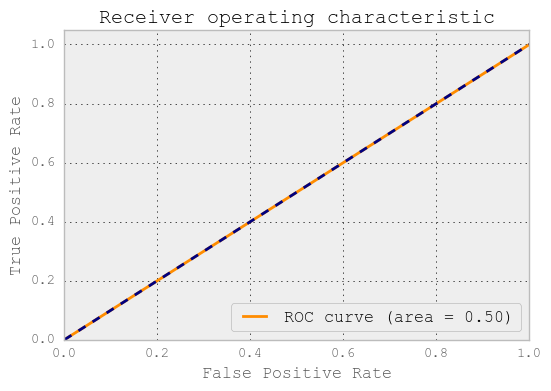


---------------------------------X----------------------------

For classifier KNeighborsClassifier:
Unoptimized model
------
Accuracy score on testing data: 0.6466
F-score on testing data: 0.7631

Optimized Model
------
Final accuracy score on the testing data: 0.6552
Final F-score on the testing data: 0.7960
Best parameters:
{'n_neighbors': 15, 'weights': 'uniform'}
For classifier KNeighborsClassifier, ROC score is 0.492695


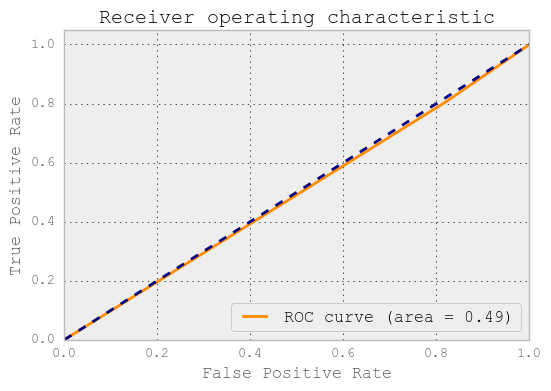


---------------------------------X----------------------------



In [65]:

from sklearn.metrics import roc_curve,auc
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
# TODO: Initialize the classifier
i=0
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    print 'For classifier %s:'%(clf_name)
    if i==0: #RandomForest
        parameters = {'max_features':['auto',None],# 'auto' option uses square root of number of features
                     'oob_score':[False,True],# setting it to 'True' saves the generalization error
                     'max_depth':[3,10,15],# depth of tree
                     'n_estimators':[3,10,15]}# number of trees
    elif i==1: #SVM
        parameters={'kernel':['poly','rbf','linear'],# different ways to separate data pts by a hyperplane
                    'C':[0.001,1,1000]} # weight of penalty assigned to error
    elif i==2: #kNearestClassifier
        parameters={'n_neighbors':[5,10,15],# number of neighbors
                    'weights':['uniform','distance']}# distance means weights are inversely proportional to distance

    scorer = make_scorer(fbeta_score, beta=2)
    grid_obj = GridSearchCV(clf,parameters,scoring=scorer)
    grid_fit = grid_obj.fit(X_train,y_train)
    best_clf = grid_fit.best_estimator_

    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)
    # Report the before-and-afterscores
    print "Unoptimized model\n------"
    print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
    print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2))
    print "\nOptimized Model\n------"
    print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
    print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2))
    print "Best parameters:"
    print grid_fit.best_params_
    fpr, tpr, _ = roc_curve(y_test, best_predictions)
    roc_auc = auc(fpr, tpr)
    print "For classifier %s, ROC score is %f"%(clf_name,roc_auc)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print "\n---------------------------------X----------------------------\n"
    i+=1

### Extracting important features
From a medical perspective, it may be important to know which features are most influential in determining whether a person has a disease or not. Also, in future, it may be possible that more examples are collected for this dataset, and we may want to use only the k best features for this dataset for classification purpose. Keeping this in mind, we will use the RandomForestClassifier to extract the features of greatest importance. 

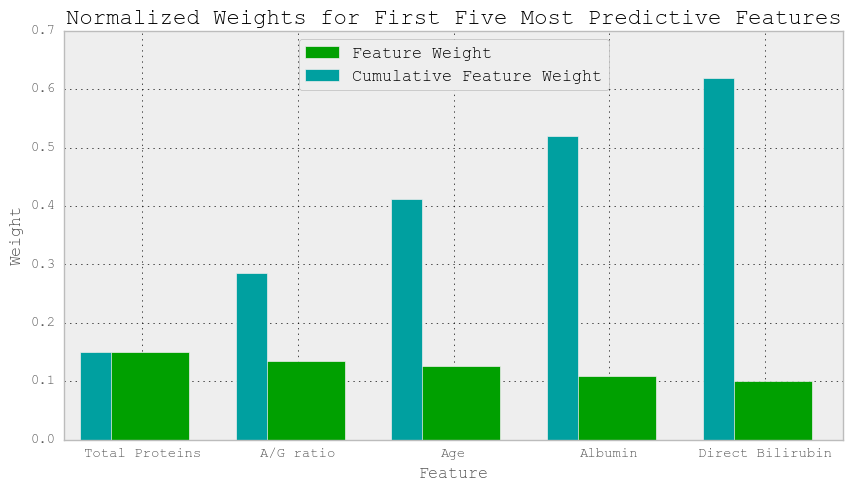

In [16]:
clf_new=clf_A.fit(X_train,y_train)#clf_A is RandomForestClassifier
im_features = clf_new.feature_importances_
vs.feature_plot(im_features, X_train, y_train)

In [20]:
from sklearn.base import clone

X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

clf = (clone(clf_A)).fit(X_train_reduced, y_train)#seeing how using only 5 best features affects RandomForestClassifier
predictions=clf_A.predict(X_test)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from Random Forest using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.7414
F-score on testing data: 0.8333

Final Model trained on reduced data
------
Accuracy on testing data: 0.6897
F-score on testing data: 0.8053


### Results of feature reduction
So,we see that 'Total Proteins' is the most important feature, although not by a significant margin. Using only 5 most important features leads to a reduction in accuracy by around 5% and F-score by around 3%. Maybe in future
if number of data points is very large and we are willing to save some training time at the cost of accuracy, we can use this method.  

### Conclusion-Final Model Evaluation
As the results show, it is difficult to arrive at a clear-cut answer for the best performing model among SVM and Random Forest. While SVM shows better result in terms of F-beta score (0.94), its area under the ROC curve is surprisingly low. Random Forest shows a decent enough F-beta score (0.87) and its area under ROC curve is 0.6. 